In [1]:
from recast.CPT import CPT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Croatian site 

In [2]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7

points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])

layout.add_measurement_instances(points = points, points_type = 'misc')
layout.generate_mesh()

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'misc' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [3]:
layout.optimize_measurements()

Correct latitudinal zone!
Correct longitudinal zone!
Optimizing misc measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


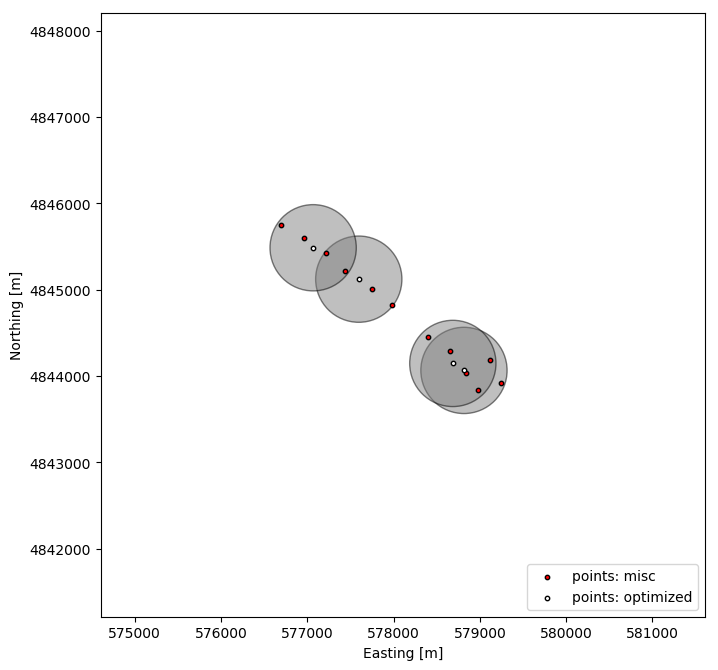

In [4]:
layout.plot_optimization(points_type = 'misc')

In [5]:
layout.generate_combined_layer(points_type = 'misc')

Generating combined layer for misc measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


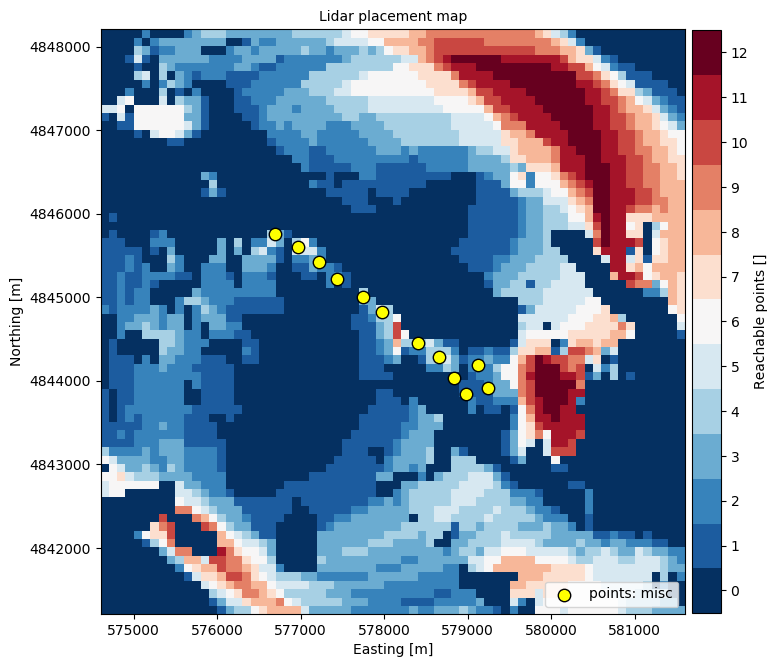

In [6]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [7]:
layout.add_lidar_instance(position = np.array([580600,4845700,100]), lidar_id = 'koshava', )

Lidar 'koshava' added to the lidar dictionary!
Lidar dictionary contains 1 lidar instance(s).


In [8]:
layout.generate_second_lidar_layer(lidar_id = 'koshava')

Updating lidar instance: 'koshava'


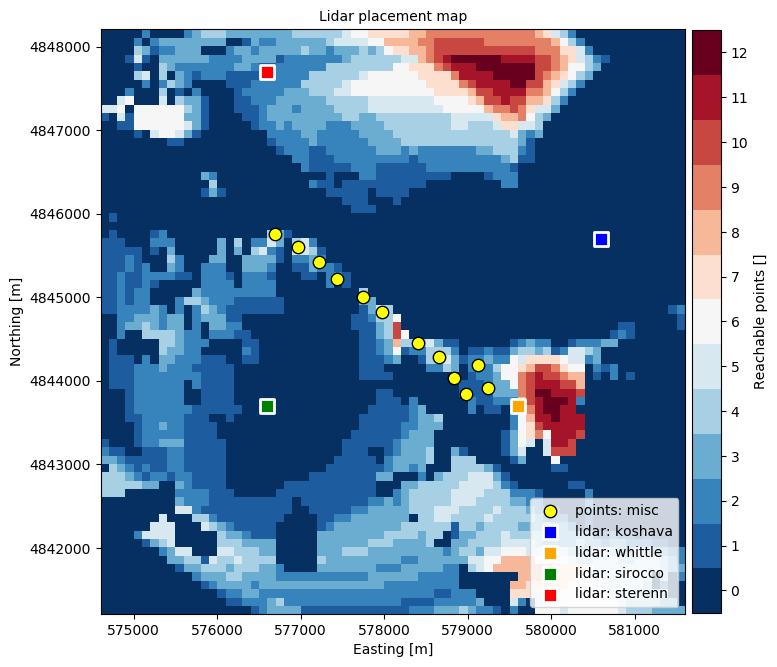

In [15]:
layout.plot_layer(layout.layer_selector('second_lidar_placement'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [17]:
layout.lidar_dictionary['koshava']['motion_config']

,Step-stare order,Azimuth [deg],Elevation [deg],Move time [ms]
0,1->2,268.34,6.58,313.0
1,2->3,265.36,6.77,346.0
2,3->4,261.35,7.31,401.0
3,4->5,256.29,8.27,450.0
4,5->6,251.42,9.40,442.0
5,6->7,240.38,9.71,665.0
6,7->8,233.96,10.15,507.0
7,8->9,226.60,9.60,543.0
8,9->10,221.19,9.13,466.0
9,10->11,224.33,10.52,355.0


In [14]:
layout.add_lidar_instance(position = np.array([580600 - 1000,4845700 - 2000,100]), lidar_id = 'whittle')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 - 2000,100]), lidar_id = 'sirocco')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 +2000,100]), lidar_id = 'sterenn')

# layout.update_lidar_instance(lidar_id = 'sterenn')


Lidar 'whittle' added to the lidar dictionary!
Lidar dictionary contains 2 lidar instance(s).
Lidar 'sirocco' added to the lidar dictionary!
Lidar dictionary contains 3 lidar instance(s).
Lidar 'sterenn' added to the lidar dictionary!
Lidar dictionary contains 4 lidar instance(s).


In [ ]:
layout.lidar_dictionary['koshava']

In [ ]:
layout.lidar_dictionary['koshava']['motion_config']

In [ ]:
for lidar in layout.lidar_dictionary:
    print(lidar)

In [ ]:
def method(**kwargs):
    kwargs.update({'lidar_id' : 'koshava'})
    print(kwargs)


method()

In [ ]:
temp_dic = {'lidar_id': 'koshava'}

In [ ]:
temp_dic['lidar_id']